# MODULES


In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn import datasets
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import chisquare


## TODO - Bonferroni Corrections

The chance of capturing rare event increases when testing multiple hypothesis. It means the likelihood of incorrectly rejecting a null hypothesis (false positive) increases. 

The Bonferroni correction rejects the null hypothesis for each $p_{i} \leq \frac {\alpha}{m}$. This ensures the [Family Wise Error Rate](https://en.wikipedia.org/wiki/Family-wise_error_rate) stays below the significance level $\alpha$. More information can be found [here](https://stats.stackexchange.com/questions/153122/bonferroni-correction-for-post-hoc-analysis-in-anova-regression).

It is useful for post-hoc tests after performing one-way ANOVA or Chi-Square tests (explained in the next chapters) that reject the null hypothesis. When comparing $N$ multiple groups, we can either do:
+ pairwise testing. In that case, $m$ will be ${N \choose 2}$.
+ one vs the rest. In that case, $m$ will be $N$.

___

# INDEPENDENT TWO-SAMPLES T-TEST
## Assumptions

As for one-sample t-tests, the assumptions or normality must be met:
+ the populations are normally distributed, OR
+ the samples are large, regardless of the underlying distribution of data, thanks to the CLT.


## Test Parameters

The null hypothesis $H_0$ states that the population mean of two samples are equal: $\mu_1 = \mu_2$. 

The test statistic is $t=(\bar {X_1}-\bar {X_2}) / s$, where $\bar {X_1}$ and $\bar {X_2}$ are the sample means and $s^2$ is a measure of common variance (its exact formula depends on whether the two samples have equal size and/or variance).

Under the null hypothesis, the test statistic follows a $t$-distribution (its degrees of freedom depend on the assumptions of equal or unequal variance). 

*Note: Student's t-test assume equality of variance; the Welch's unequal variances t-test, or Welch U test, doesn't make such assumptions. The litterature [does not recommend](https://onlinelibrary.wiley.com/doi/abs/10.1348/000711004849222) to test equality of variances before choosing between the two test. In general, using the Welch U test must be [preferred](https://www.rips-irsp.com/articles/10.5334/irsp.82/).*

*Note (mathematical intuition): The independent two-samples t-test assumes that both sampling distribution of sample means follow a normal distribution. The sum of two normally distributed variables also follows a normal distribution, which leads to the mathematical proof that the test statistic follows a $t$-distribution.*


## Example

Let's imagine that we want to compare the daily production of two plants over 10 days.


### Assumptions of Normality

The sample size is very small, so we need to check the assumption of normality before performing the t-test. We reject the null hypothesis of normality if the p-value is below $\alpha = 0.05$. 


### Hypothesis

We will perform a t-test with the following parameters:
+ our null hypothesis states that the population means are equal: $\mu_1 = \mu_2$. 
+ our alternate hypothesis states that $\mu_1 \neq \mu_2$ (two-sided t-test).
+ we set the signifance level $\alpha = 0.05$.

We will reject the null hypothesis if the p-value is below $\alpha$. 


In [1]:
# modules
import numpy as np
from scipy import stats

# comparing the prod distribution of two plants using the
# number of cars produced over the same 10 days
cars_plant1 = [1243, 1240, 1165, 1210, 1326, 1162, 1019, 1288, 1337, 1166]
cars_plant2 = [1099,  972, 1130, 1305,  953,  1062, 1316, 1153,  906, 1109]

# sample means
print('mean production: plant1 = {:.0f} - plant2 = {:.0f}'.format(np.mean(cars_plant1), np.mean(cars_plant2)))

# test for normality
_, plant1_norm_p = stats.shapiro(cars_plant1)
_, plant2_norm_p = stats.shapiro(cars_plant2)

print('p-values for normality: plant1 = {:.3f} - plant2 = {:.3f}'.format(plant1_norm_p, plant2_norm_p))

# two-sided t-test
t_stat, t_p = stats.ttest_ind(cars_plant1, cars_plant2, equal_var=False)
print('p-value of t-test: {:0.5f}'.format(t_p))


mean production: plant1 = 1216 - plant2 = 1100
p-values for normality: plant1 = 0.482 - plant2 = 0.520
p-value of t-test: 0.04412


___

# LINEAR REGRESSION
## Sum of Squares

The distance from any point in a collection of data, to the mean of the data, is the deviation. This can be written as $y_{i}-\overline {y}$ where $y_{i}$ is the i-th data point, and $\overline {y}$ is the estimate of the mean. If all such deviations are squared, then summed, this gives the "total sum of squares" for these data:

$$SS_{total} = \sum _{i=1}^{n}\left(y_{i}-{\overline {y}}\,\right)^{2}$$

If we fit a linear regression model, this total sum of square can be written as:

$$SS_{total} = SS_{regression} + SS_{error} = SS_{explained} + SS_{residuals} = ESS + RSS$$

The (ordinal) least square approach chooses coefficients for the linear model that minimize the RSS. 

## Residual Squared Error and R²

The variance of the error terms (assuming that the errors $\epsilon_i$ for each observation are uncorrelated with common variance) is often noted $\sigma^2$. The estimate of $\sigma$ is called the residual standard error, and is considered a measure of the lack of fit of the model (the smaller it is, the better the model fits the data): 

$$RSE = \sqrt{RSS / (n-2)}$$

The RSE is expressed as units of the response variable. The R² statistic provides an alternative measure of fit. It's the proportion of variance
explained, so it always takes on a value between 0 and 1, and is independent of the scale of Y.

$$R^2 = \frac{ESS}{TSS} = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$


## Relationship between response and individual predictors

We build our model from a single sample drawn from the population. Using a different sample would have led to slightly different values of these coefficients, and we want to quantify this variability.

We can use the standard error of each coefficient about its mean to estimate their confidence intervals. Consequently, we can perform a t-test to check the null hypothesis that there is no relationship between a predictor and the response:

$$t_{\beta_i} = \frac{\hat{\beta_i} - 0}{SE(\hat{\beta_i})} \sim tdist_{n-2} \textit{ if }H_0\textit{ is true}$$

_Note: the actual expression of the standard error of regression coefficients is complex but they are multiple of RSE^2._


## Relationship between response and all predictors

In addition to the tests above, we can also test the null hypothesis that all coefficients are equal to zero. This test is performed using the F-statistic:

$$F = \frac{ESS/p}{RSS/(n-p-1)}$$

where $p$ is the number of predictors and $n$ the number of observations. A F-statistic greater than one will indicate a relationship between the response and at least one predictor. When $H_0$ is true and the errors $\epsilon_i$ have a normal distribution (or if $n$ is large), the F-statistic follows a F-distribution which means we can calculate the p-value of the F-statistic under $H_0$.


___

# ANOVA

The ANalysis Of VAriance ([ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance)) tests are an extension of t-tests when dealing with more than two samples.

+ one-way ANOVA null hypothesis: the means of three or more populations are equal _(see example [here](https://en.wikipedia.org/wiki/One-way_analysis_of_variance#Example))._
+ repeated measures ANOVA null hypothesis: the average difference between in-sample values is null.


## Assumptions

ANOVA is mathematically a [generalized linear model (GLM)](https://pythonfordatascience.org/anova-python/), where the factors of all the categorical variables have been one-encoded. In particular, factorial ANOVA include interaction terms between categorical factors and should therefore be interpreted like traditional linear models.

ANOVA being a GLM, assumptions are the same as for linear regression:

+ Normality: the distributions of the residuals are normal.
+ Homogeneity of variance, or homoscedasticity: the variance of data in groups should be the same.
+ Independent observations.

_Note: If group sizes are equal, the F-statistic (see below) is robust to violations of normality and homogeneity of variance._


## F-statistic

ANOVA compares two types of variance:

+ between groups: how far group means stray from the total mean.
+ within groups: how far individual values stray from their respective group mean.

The F-statistic is the variance between groups divided by the variance within groups. 

$$F = \frac{\text{explained variance}}{\text{unexplained variance}} = \frac{\text{between-groups variability}}{\text{within-groups variability}} = \frac{SS_{between-groups} / (\text{groups}- 1)}{SS_{within-groups} / (\text{group size}- \text{groups})}$$

We reject the null hypothesis that the groups belong to the same population if the variance between groups is large compared to the variance within groups.


## F-distribution

If the assumptions are met, the F-statistic follows an [F-Distribution](https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Continous-Random-Variables/F-Distribution/index.html) under the null hypothesis. 


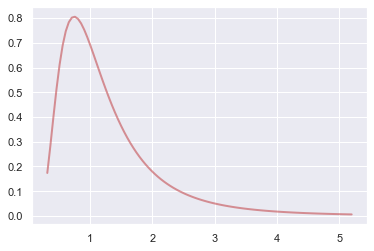

In [2]:
# modules
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

# degrees of freedom
dfn, dfd = 30, 8

# 100 x points between the first and 99th percentile of the f-distribution & corresponding f values
x = np.linspace(stats.f.ppf(0.01, dfn, dfd), stats.f.ppf(0.99, dfn, dfd), 100)
y = stats.f.pdf(x, dfn, dfd)

# plot
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.f.pdf(x, dfn, dfd), 'r-', lw=2, alpha=0.6, label='f pdf')


## One-way ANOVA

The one-way ANOVA tests if several samples have the same mean.


In [3]:
# modules
from scipy import stats

# number of days each customer took to pay an invoice based on a percentage of discount if early payment
discount_0perc = [14, 11, 18, 16, 21]
discount_1perc = [21, 15, 23, 10, 16]
discount_2perc = [11, 16,  9, 14, 10]

stats.f_oneway(discount_0perc, discount_1perc, discount_2perc) # p-value > 0.05, the discounts make no significant difference


F_onewayResult(statistic=2.121212121212121, pvalue=0.16262315311926887)

## Two-way ANOVA

The two-way ANOVA is an extension of the one-way ANOVA to test two independant variables at the same time, taking interactions between these variables into account. 

_Note: this can be further generalized to N-way (or factorial) ANOVA._


In [10]:
# modules
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# data - same as before, but checking if the amount has an impact
df = pd.DataFrame({
    'discount': ['2p','2p','2p','2p','2p','1p','1p','1p','1p','1p','0p','0p','0p','0p','0p'],
    'amount': [50,100,150,200,250,50,100,150,200,250,50,100,150,200,250],
    'days': [16,14,11,10,9,23,21,16,15,10,21,16,18,14,11]
})

# fit without interaction factor
model = smf.ols('days ~ C(discount) + amount', df).fit()

# discount has now become significant
#sm.stats.anova_lm(model, typ=2)

model.summary()


C:\Users\sebastien.plat\AppData\Local\Programs\Python\Python38-32\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   days   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     35.33
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           6.10e-06
Time:                        10:56:31   Log-Likelihood:                -25.175
No. Observations:                  15   AIC:                             58.35
Df Residuals:                      11   BIC:                             61.18
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            23.2000      1.070     21.677      0.000      20.844      25.556
C(discount)[T.1p]     1.0000      0.957      1.045      0.319      -1.107       3.107
C(discount)[T.2p]    -4.0000      0.957     -4.179      0.002      -6.107      -1.893
amount               -0.0480      0.006     -8.685      0.000      -0.060      -0.036
==============================================================================
Omnibus:                        0.365   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.496
Skew:                          -0.220   Prob(JB):                        0.780
Kurtosis:                       2.226   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note on `model.summary()`:
+ Durban-Watson detects the presence of autocorrelation.
+ Jarque-Bera tests the assumption of normality.
+ Omnibus tests the assumption of homogeneity of variance.
+ Condition Number assess multicollinearity (should be < 20).

In [ ]:
# data - three fertilizers, warm vs cold, size of plant
df = pd.DataFrame({
    'fertilizer': ['A','A','A','A','A','A','B','B','B','B','B','B','C','C','C','C','C','C'],
    'temperature': ['W','W','W','C','C','C','W','W','W','C','C','C','W','W','W','C','C','C'],
    'size': [13,14,12,16,18,17,21,19,17,14,11,14,18,15,15,15,13,8]
})

# fit with interaction factor
model = ols('size ~ C(fertilizer) * C(temperature)', df).fit()

# discount has now become significant
sm.api.stats.anova_lm(model, typ=2)

# model.summary()
